# **Pertemuan 3 - Probabilistic Model and Axioms**

Introduction to Probability Course - Sekolah Data - Pacmann Academy

**Outline**

1. Review
2. Case 1 - Simulasi Lempar Dadu
3. Case 2 - Keuntungan Perusahaan
4. Case 3 - Popularitas Menu Makanan

## **Review**
---

- **Probabilistic Model:** Model yang menjelaskan kondisi **uncertain** dengan **lebih sistematis**
- **Random Experiment:** Proses melakukan observasi ke sesuatu yang masih **uncertain**

    Contoh:
    - Observasi pelemparan dadu 6 sisi 
    - Observasi terjadinya gol di pertandingan Sepak Bola
    - Observasi banyaknya email masuk dalam sehari
    - dll
- **Sample Space:** Kumpulan possible outcomes yang mungkin bisa terjadi dalam suatu experiment. Umumnya di notasikan dalam bentuk $\Omega$ (Omega)

    Contoh:
    - Kemungkinan gol yang bisa terjadi dalam satu pertandingan Sepak Bola
    - Waktu menunggu kedatangan Bus di Halte
    - dll
- **Event:** Kejadian yang terjadi di dalam Sample Space

    Contoh:
    - Event terjadinya Gol yang dicetak oleh Striker
    - Event terjadinya Gol yang dicetak oleh Midfielder
    - dll
    
- Setelah memiliki **Sample Space** dan **Event**, maka selanjutntya adalah membuat Probability Model
- Pendekatan Probability Model yang paling sederhana adalah dengan menghitung proporsi frekuensi kejadian Event di dalam Sample Space

##### Probability Formula

$$P(E)=\frac{n(E)}{n(\Omega)}$$

## **Study Case #1: Pelemparan Dadu**
---


<img src="https://cdn-icons-png.flaticon.com/512/7101/7101743.png" alt="drawing" width="200"/>

Kita melakukan pelemparan **satu** dadu 6 sisi, ditanya:
- Berapa peluang munculnya angka $6$ saat melempar dadu?  

Untuk menjawab pertanyaan tersebut, kita bisa menjawab dengan dua pendekatan, yaitu:
- Melakukan **simulasi** melemparkan dadu secara berkali - kali
- Menggunakan rumus Probability untuk mencari nilainya

---

### **Pendekatan 1: Simulasi**

- Lalu, berapakah nilai peluang munculnya angka $6$ jika melakukan pelemparan sebanyak 5x?

- Dengan bantuan Python, kita bisa melakukan simulasi pelemparan tersebut

In [1]:
# IMPORT LIBRARY

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Sekarang kita coba lakukan simulasi pelemparan sebanyak 5x

In [2]:
hasil_pelemparan = np.random.randint(1, 7, 5) # membuat angka random dari 1 - 6 sebanyak 5 kali

print(hasil_pelemparan)

[4 1 5 3 4]


Untuk menghitung berapa kali kemunculan mata dadu dalam 5x pelemparan, kita bisa menggunakan `np.unique()`

In [3]:
event_yang_muncul, frekuensi_muncul = np.unique(hasil_pelemparan, return_counts=True) 
# parameter return_counts berguna untuk menghitung berapa banyak unique value yang muncul

In [4]:
event_yang_muncul, frekuensi_muncul

(array([1, 3, 4, 5], dtype=int32), array([1, 1, 2, 1]))

Sekarang, kita coba menghitung nilai Probability dari pelemparan dadu 5x

In [5]:
proba_event = frekuensi_muncul / 5

proba_event

array([0.2, 0.2, 0.4, 0.2])

Agar lebih mudah untuk melakukan interpretasi, kita gunakan visualisasi

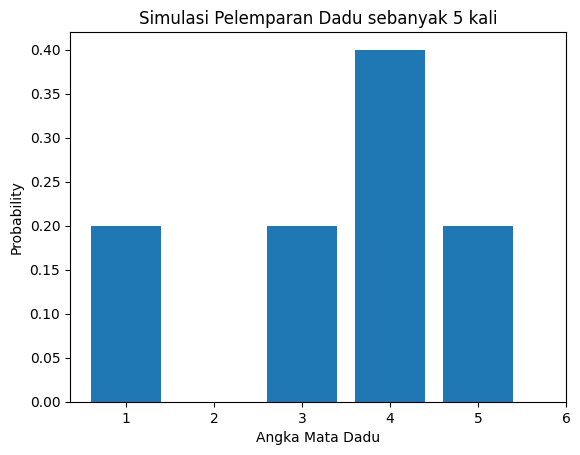

In [6]:
plt.bar(event_yang_muncul, proba_event)
plt.title("Simulasi Pelemparan Dadu sebanyak 5 kali")
plt.xticks(np.arange(1, 7))
plt.xlabel("Angka Mata Dadu")
plt.ylabel("Probability")
plt.show()

- Nah, kalau kita lihat nilai probability dari masing - masing mata dadu ada yang belum memiliki nilai peluang
- Maka, kita coba lakukan pelemparan lebih banyak lagi (100x, 1.000x, 10.000x, ...)

Agar code nya terlihat lebih rapi dan mudah dipanggil, maka akan "dibungkus" dengan `function`

In [7]:
def probability_model_dadu(jumlah_pelemparan):
    """
    Simulasi pelemparan dadu 6 sisi sebanyak n kali

    Parameters
    ----------
        jumlah_pelemparan   : int 
                              jumlah pelemparan yang dilakukan
    """
    
    # melakukan pelemparan dadu sebanyak jumlah_pelemparan 
    hasil_pelemparan = np.random.randint(1, 7, jumlah_pelemparan)

    # untuk mengetahui berapa kali kemunculan mata dadu dalam jumlah_pelemparan
    event_yang_muncul, frekuensi_muncul = np.unique(hasil_pelemparan, return_counts=True)
    
    # menghitung probability
    proba_event = frekuensi_muncul / jumlah_pelemparan

    # melakukan visualisasi
    plt.bar(event_yang_muncul, proba_event)
    plt.title(f"Simulasi Pelemparan Dadu sebanyak {jumlah_pelemparan} kali")
    plt.xticks(np.arange(1, 7))
    plt.xlabel("Angka Mata Dadu")
    plt.ylabel("Probability")
    plt.show()

Sekarang kita coba lakukan eksperimen pelemparan dadu sebanyak 1000x dengan menggunakan function `probability_model_dadu`

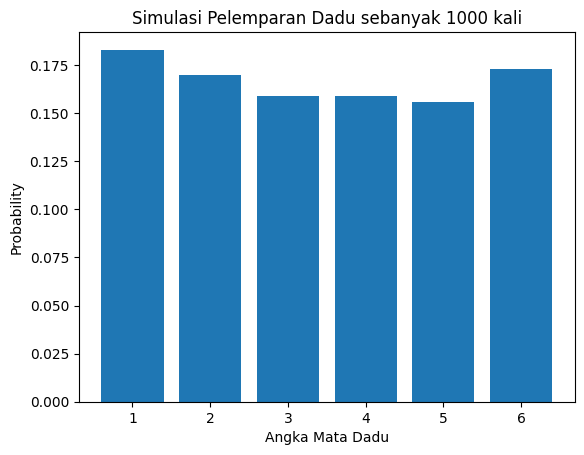

In [8]:
probability_model_dadu(jumlah_pelemparan=1000)

- Kalau kita lihat, sekarang masing - masing mata dadu memiliki nilai Probability
- Jika kita bandingkan dengan pelemparan sebanyak `5x`, nilai Probability dari masing - masing mata dadu juga ikut berubah

- Sekarang kita coba lakukan simulasi pelemparan dengan jumlah yang besar. Seperti melemparkan sebanyak `100.000` dan `1.000.000` kali

#### Pelemparan 100.000x

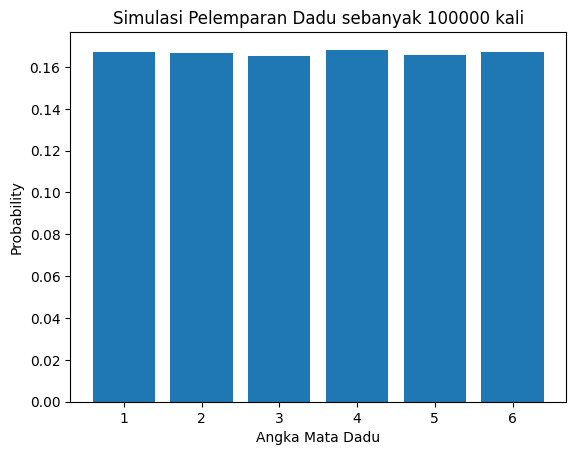

In [9]:
probability_model_dadu(jumlah_pelemparan=100000)

#### Pelemparan 1.000.000x

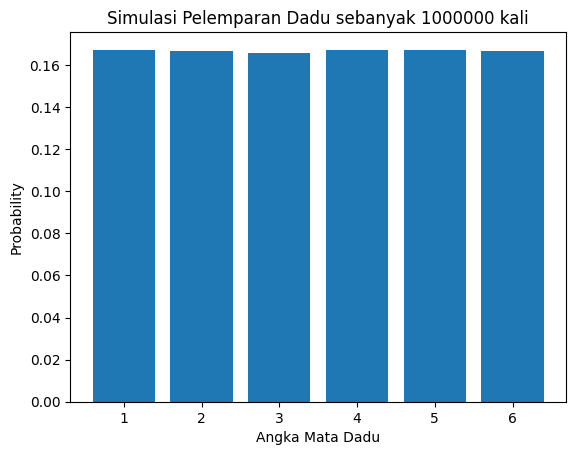

In [10]:
probability_model_dadu(jumlah_pelemparan=1000000)

- Dapat dilihat bahwa setelah melakukan simulasi pelemparan sebanyak `100.000` dan `1.000.000` nilai Probability nya mulai sama dan cenderung stabil
- Nilai Probability dari masing - masing mata dadu juga memiliki nilai yang relatif sama, yaitu $0.16666666666666666$ 
- Dapat disimpulkan, semakin banyak jumlah simulasi atau eksperimen yang dilakukan maka nilai Probability nya akan mulai stabil

---

### **Pendekatan 2: Probability Formula**
---

- Selain menggunakan pendekeatan Simulasi, kita juga bisa langsung mencari nilai Probability nya menggunakan Probability Formula
- Jika teman - teman lupa, langkah pertama kita harus menentukan Sample Space nya terlebih dahulu

- Karena disini kita melakukan eksperimen pelemparan **satu** dadu 6 sisi, maka Sample Space nya sebagai berikut

$$\Omega=\{1,2,3,4,5,6\} \\
n(\Omega)=6
$$

- Lalu langkah selanjutnya untuk mencari nilai Probability kita membutuhkan **Event**
- Karena yang diminta adalah mencari nilai Probability Angka 6 saat melempar dadu, maka Event nya sebagai berikut
$$E=\{6\} \\ 
n(E)=1
$$

- Setelah mendapatkan Sample Space dan Event, maka langkah selanjutnya adalah memasukkannya ke Probability Formula
$$
P(E)=\frac{n(E)}{n(\Omega)} \\ 
P(6)=\frac{1}{6}= 0.16666666666666666
$$

In [11]:
1/6

0.16666666666666666

---
#### Kesimpulan
- Untuk mencari nilai Probability dari pelemparan dadu, kita bisa menggunakan dua pendekatan yaitu dengan pendekatan Simulasi dan pendekatan menggunakan Formula
- Dari kedua pendekatan tersebut didapatkan hasil yang sama yaitu sekitar $P(6)=0.16666666666666666$
---

## **Study Case #2: Keuntungan Perusahaan**

---

- Dibawah ini adalah data mengenai keuntungan dari banyak perusahaan
- Dimana, dari jumlah keuntungan yang didapatkan per tahun akan dikategorikan seperti tabel dibawah ini

| **Kategori** | **Keuntungan per Tahun** | **Jumlah Perusahaan** |
|--------------|--------------------------|-----------------------|
|       A      | < 10 Juta                |                    60 |
|       B      | 10 Juta s.d 19 Juta      |                   100 |
|       C      | 20 Juta s.d 29 Juta      |                   160 |
|       D      | 30 Juta s.d 39 Juta      |                   140 |
|       E      | > 40 Juta                |                    40 |
| Total        |                          |                   500 |

---

#### **Pertanyaan 1:** Berapakah nilai Probability dari Perusahaan yang memiliki keuntungan dibawah 10 Juta?

##### Jawaban

- Dapat dilihat bahwa Perusahaan yang memiliki keuntungan dibawah 10 Juta adalah `Kategori A`
- Jika kita menjawab dengan Probability Formula, maka akan seperti berikut
$$P(A)=\frac{n(A)}{n(\Omega)}$$

- Sekarang, kita coba jawab dengan bantuan Python!

In [12]:
# Data dari tabel
n_A = 60
n_sample_space = 500

- Setelah menentukan Sample Space dan Event, kita masukkan ke Probability Formula

In [13]:
p_A = n_A / n_sample_space

print(f"Nilai Probability dari Perusahaan yang memiliki keuntungan dibawah 10 Juta adalah {p_A}")

Nilai Probability dari Perusahaan yang memiliki keuntungan dibawah 10 Juta adalah 0.12


---
#### **Pertanyaan 2:** Berapakah nilai Probability dari Perusahaan yang memiliki keuntungan 10 Juta s.d 19 Juta **atau** diatas 40 Juta?

- Karena yang diminta adalah Perusahaan yang memiliki keuntungan 10 Juta s.d 19 Juta maka termasuk `Kategori B`
- Perusahaan yang memiliki keuntungan diatas 40 Juta termasuk `Kategori E`
- `Atau` biasanya dinotasikan sebagai $\cup$, sehingga kita akan mencari $P(B \cup E)$

> ***Hint:*** Untuk menjawab pertanyaan ini, teman - teman coba recall kembali mengenai **Axioms of Probability**

In [ ]:
# Langkah - langkahnya sama seperti pertanyaan sebelumnya
...

In [ ]:
# Langkah - langkahnya sama seperti pertanyaan sebelumnya
...

## **Study Case #3: Popularitas Menu Makanan**
---

- Diberikan data Popularitas Menu Makanan di dalam file [`popularitas-menu.csv`](https://drive.google.com/file/d/1pZh31V434zqA1sZXmZmlB8riY3Fzwzfk/preview)
- Untuk membaca file dengan format `.csv` kita bisa menggunakan library `Pandas`

> ***Note:*** Kita gunakan syntax `pd.read_csv(nama_file)` untuk membaca file csv tersebut

In [15]:
# Membaca Data
data_makanan = pd.read_csv('C:/Users/farha/Documents/pacmann/02_probability/dataset/week-3-4-popularitas-menu.csv')

data_makanan.head() # untuk mengambil data 5 teratas

,No,Nama Menu
0,1,Nasi Pecel
1,2,Nasi Gule
2,3,Nasi Rawon
3,4,Nasi Soto
4,5,Nasi Soto


In [16]:
# Menampilkan informasi data yang dimiliki
data_makanan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   No         200 non-null    int64 
 1   Nama Menu  200 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.2+ KB


In [17]:
# Menampilkan Kolom Nama Menu berisi apa saja dan berapa jumlahnya
data_makanan["Nama Menu"].value_counts()

Nama Menu
Nasi Soto     60
Nasi Gule     52
Nasi Rawon    49
Nasi Pecel    39
Name: count, dtype: int64

- Terdapat 2 kolom data, yaitu `No` dan `Nama Menu`
- Terdapat 200 data
- Kolom `Nama Menu` terdiri dari `Nasi Pecel`, `Nasi Gule`, `Nasi Soto`, dan `Nasi Rawon`

---
#### **Pertanyaan 1:** Berapakah nilai Probability Popularitas dari **menu Nasi Pecel**?

Asumsikan $A=\{\text{Menu Nasi Pecel}\}$

In [18]:
# Langkah 1/3
# Mencari Sample Space

n_sample_space = len(data_makanan)

print(f"Jumlah Sample Space yang dimiliki adalah {n_sample_space}")

Jumlah Sample Space yang dimiliki adalah 200


> ***Note:*** `len()` adalah syntax untuk mencari banyak/panjang dari sebuah data

In [19]:
# Langkah 2/3
# Melakukan "filter" menu Nasi Pecel

kondisi_A = data_makanan["Nama Menu"] == "Nasi Pecel"

event_A = data_makanan[kondisi_A]

# Melihat hasilnya setelah melakukan "filter"
print("Contoh data pada Event A")
print(event_A)

# Mencari jumlah kejadian yang terjadi di Event Nasi Pecel
n_A = len(event_A)
print("\n")
print(f"Jumlah kejadian yang terjadi di Event Nasi Pecel {n_A}")

Contoh data pada Event A
      No   Nama Menu
0      1  Nasi Pecel
5      6  Nasi Pecel
7      8  Nasi Pecel
13    14  Nasi Pecel
15    16  Nasi Pecel
17    18  Nasi Pecel
23    24  Nasi Pecel
28    29  Nasi Pecel
31    32  Nasi Pecel
41    42  Nasi Pecel
49    50  Nasi Pecel
50    51  Nasi Pecel
56    57  Nasi Pecel
70    71  Nasi Pecel
71    72  Nasi Pecel
72    73  Nasi Pecel
73    74  Nasi Pecel
76    77  Nasi Pecel
78    79  Nasi Pecel
83    84  Nasi Pecel
86    87  Nasi Pecel
87    88  Nasi Pecel
95    96  Nasi Pecel
96    97  Nasi Pecel
100  101  Nasi Pecel
105  106  Nasi Pecel
108  109  Nasi Pecel
126  127  Nasi Pecel
128  129  Nasi Pecel
132  133  Nasi Pecel
140  141  Nasi Pecel
144  145  Nasi Pecel
151  152  Nasi Pecel
152  153  Nasi Pecel
158  159  Nasi Pecel
164  165  Nasi Pecel
166  167  Nasi Pecel
176  177  Nasi Pecel
197  198  Nasi Pecel


Jumlah kejadian yang terjadi di Event Nasi Pecel 39


> ***Note:*** Untuk mencari kejadian di suatu kondisi tertentu, kita bisa melakukan filtering dengan syntax berikut: `data_makanan["NAMA_KOLOM"] == "KONDISI_YANG_DIINGINKAN"`.
Semisal `data_makanan["Nama Menu"] == "Nasi Pecel"` Dibaca: mencari dari data `data_makanan` dengan kolom `Nama Menu` bernilai `Nasi Pecel`

In [20]:
# Langkah 3/3
# Mencari nilai Probability dengan cara membagi n_A dengan n_sample_space

p_A = n_A / n_sample_space

print(f"Nilai Probability dari Popularitas menu Nasi Pecel adalah {p_A}")

Nilai Probability dari Popularitas menu Nasi Pecel adalah 0.195


Dapat disimpulkan bahwa nilai Probability dari Popularitas menu Nasi Pecel adalah 0.195
$$P(A)=0.195$$

---
#### **Pertanyaan 2:** Berapakah nilai Probability Popularitas dari **menu Nasi Soto**?

Asumsikan $B=\{\text{Menu Nasi Soto}\}$

Karena masih menggunakan Sample Space yang sama, maka kita akan menggunakan `n_sample_space`

<details>
    <summary><b>Klik untuk melihat kunci jawaban</b></summary>

```python
# Langkah 2/3
# Melakukan "filter" menu Nasi Soto

event_B = data_makanan[data_makanan["Nama Menu"] == "Nasi Soto"]

# Melihat hasilnya setelah melakukan "filter"
print("Contoh data pada Event B")
print(event_B)

# Mencari jumlah kejadian yang terjadi di Event Nasi Soto
n_B = len(event_B)
print("\n")
print(f"Jumlah kejadian yang terjadi di Event Nasi Pecel {n_B}")
```

</details>

---

In [22]:
# Langkah 1/2
# Melakukan "filter" menu Nasi Soto

event_B = data_makanan[data_makanan["Nama Menu"] == "Nasi Soto"]

# Melihat hasilnya setelah melakukan "filter"
print("Contoh data pada Event B")
print(event_B)

# Mencari jumlah kejadian yang terjadi di Event Nasi Soto
n_B = len(event_B)
print("\n")
print(f"Jumlah kejadian yang terjadi di Event Nasi Pecel {n_B}")

Contoh data pada Event B
      No  Nama Menu
3      4  Nasi Soto
4      5  Nasi Soto
6      7  Nasi Soto
9     10  Nasi Soto
14    15  Nasi Soto
20    21  Nasi Soto
22    23  Nasi Soto
24    25  Nasi Soto
29    30  Nasi Soto
35    36  Nasi Soto
38    39  Nasi Soto
40    41  Nasi Soto
42    43  Nasi Soto
43    44  Nasi Soto
54    55  Nasi Soto
55    56  Nasi Soto
57    58  Nasi Soto
60    61  Nasi Soto
62    63  Nasi Soto
68    69  Nasi Soto
77    78  Nasi Soto
79    80  Nasi Soto
81    82  Nasi Soto
82    83  Nasi Soto
90    91  Nasi Soto
102  103  Nasi Soto
107  108  Nasi Soto
112  113  Nasi Soto
113  114  Nasi Soto
116  117  Nasi Soto
117  118  Nasi Soto
119  120  Nasi Soto
120  121  Nasi Soto
124  125  Nasi Soto
125  126  Nasi Soto
130  131  Nasi Soto
134  135  Nasi Soto
135  136  Nasi Soto
137  138  Nasi Soto
145  146  Nasi Soto
146  147  Nasi Soto
148  149  Nasi Soto
149  150  Nasi Soto
155  156  Nasi Soto
156  157  Nasi Soto
157  158  Nasi Soto
159  160  Nasi Soto
167  168  Nasi 

<details>
    <summary><b>Klik untuk melihat kunci jawaban</b></summary>

```python
# Langkah 3/3
# Mencari nilai Probability dengan cara membagi n_B dengan n_sample_space

p_B = n_B / n_sample_space

print(f"Nilai Probability dari Popularitas menu Nasi Soto adalah {p_B}")
```

</details>

---

In [23]:
# Langkah 2/2
# Mencari nilai Probability dengan cara membagi n_B dengan n_sample_space

p_B = n_B / n_sample_space

print(f"Nilai Probability dari Popularitas menu Nasi Soto adalah {p_B}")

Nilai Probability dari Popularitas menu Nasi Soto adalah 0.3


---
#### **Pertanyaan 3:** Berapakah nilai Probability Popularitas dari **menu Nasi Pecel atau Nasi Gule**?

- Asumsikan $A= \{\text{Menu Nasi Pecel}\}$
- Asumsikan $C= \{\text{Menu Nasi Gule}\}$

Karena masih menggunakan Sample Space yang sama, maka kita akan menggunakan `n_sample_space`

In [24]:
# Langkah 1/2
# Melakukan "filter" menu Nasi Pecel

kondisi_A = data_makanan["Nama Menu"] == "Nasi Pecel"
event_A = data_makanan[kondisi_A]

kondisi_C = data_makanan["Nama Menu"] == "Nasi Gule"
event_C = data_makanan[kondisi_C]

# Melihat hasilnya setelah melakukan "filter"
print("Contoh data pada Event A")
print(event_A.head()) # mengambil 5 data teratas

print("Contoh data pada Event C")
print(event_C.head()) # mengambil 5 data teratas

# Mencari jumlah kejadian yang terjadi di Event Nasi Pecel dan Event Nasi Gule
n_A = len(event_A)
n_C = len(event_C)
print("")
print(f"Jumlah kejadian yang terjadi di Event Nasi Pecel {n_A}")

print("")
print(f"Jumlah kejadian yang terjadi di Event Nasi Gule {n_C}")

Contoh data pada Event A
    No   Nama Menu
0    1  Nasi Pecel
5    6  Nasi Pecel
7    8  Nasi Pecel
13  14  Nasi Pecel
15  16  Nasi Pecel
Contoh data pada Event C
    No  Nama Menu
1    2  Nasi Gule
8    9  Nasi Gule
12  13  Nasi Gule
16  17  Nasi Gule
21  22  Nasi Gule

Jumlah kejadian yang terjadi di Event Nasi Pecel 39

Jumlah kejadian yang terjadi di Event Nasi Gule 52


In [25]:
# Langkah 2/2
# Mencari nilai Probability dengan cara membagi n_A dengan n_sample_space untuk masing - masing Event

p_A = n_A / n_sample_space
p_C = n_C / n_sample_space

print(f"Nilai Probability dari Popularitas menu Nasi Pecel adalah {p_A}")
print(f"Nilai Probability dari Popularitas menu Nasi Gule adalah {p_C}")

Nilai Probability dari Popularitas menu Nasi Pecel adalah 0.195
Nilai Probability dari Popularitas menu Nasi Gule adalah 0.26


Karena yang diminta adalah mencari nilai Probability Popularitas **menu Nasi Pecel atau menu Nasi Gule** maka $P(A \cup C)$

In [26]:
p_A_union_C = p_A + p_C

print(f"Nilai Probability dari Popularitas menu Nasi Pecel atau menu Nasi Gule adalah {p_A_union_C}")

Nilai Probability dari Popularitas menu Nasi Pecel atau menu Nasi Gule adalah 0.455


Dapat disimpulkan bahwa Probability dari Popularitas menu Nasi Pecel dan menu Nasi Gule adalah 0.455
$$P(A \cup C) = 0.455$$

---
#### **Pertanyaan 4 - [CHALLENGE]:** Berapakah nilai Probability dari **menu Nasi Soto atau Nasi Gule atau Nasi Rawon**?

Karena masih menggunakan Sample Space yang sama, maka kita akan menggunakan `n_sample_space`

In [ ]:
# Silahkan tulis code Anda disini
...